In [107]:
import torch
from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions.normal import Normal
from torch.distributions.independent import Independent

import matplotlib.pyplot as plt


In [116]:
loc = torch.zeros(3)
scale = torch.ones([3])
scale

tensor([1., 1., 1.])

In [117]:
normal = Normal(loc=loc, scale=scale)
[normal.batch_shape, normal.event_shape]
normal.sample([3])
normal.log_prob(torch.tensor([0.2, 0.2, 0.2]))

tensor([-0.9389, -0.9389, -0.9389])

In [119]:
mvn = MultivariateNormal(loc, scale_tril=torch.diag(scale))
[mvn.batch_shape, mvn.event_shape]
mvn.sample()


tensor([ 0.3563,  0.9383, -0.3383])

In [263]:
loc2 = torch.zeros([3,2])
#scale = torch.tensor([[1,2,0],[2,1,2],[0,2,1]])
#scale2 = torch.eye(2).repeat(3,1,1)
scale2 = torch.tensor([[[1., 0.],[0., 2.]],[[2., 0.],[0., 1.]],[[2., 0.],[0., 2.]]])
#torch.diag(scale[0])
scale2


tensor([[[1., 0.],
         [0., 2.]],

        [[2., 0.],
         [0., 1.]],

        [[2., 0.],
         [0., 2.]]])

In [264]:
mvn2 = MultivariateNormal(loc=loc2, scale_tril=scale2)
print("[mvn2.batch_shape, mvn2.event_shape]: ",[mvn2.batch_shape, mvn2.event_shape])
print("mvn2: ", mvn2)


[mvn2.batch_shape, mvn2.event_shape]:  [torch.Size([3]), torch.Size([2])]
mvn2:  MultivariateNormal(loc: torch.Size([3, 2]), scale_tril: torch.Size([3, 2, 2]))


In [265]:
plt_sample_batch = mvn2.sample([2000])

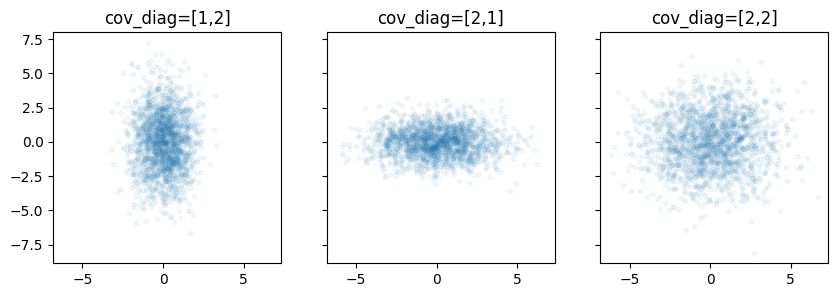

In [266]:
fig, axs = (plt.subplots(1,3, sharex=True, sharey=True, figsize=(10,3)))
titles = ['cov_diag=[1,2]','cov_diag=[2,1]','cov_diag=[2,2]']
for i, (ax, title) in enumerate(zip(axs, titles)):
    samples = plt_sample_batch[:,i,:] #take the ith batch [samples x event_shape in TF.probability NOT PyTorch!!
    ax.scatter(samples[:,0],samples[:,1],marker='.', alpha=0.05)
    ax.set_title(title)
plt.show()

In [53]:
diagn = Independent(normal, 1)
[diagn.batch_shape, diagn.event_shape]
diagn.log_prob(torch.tensor([0.2,0.2,0.2]))

tensor(-2.8168)